In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from massspec_ml.pytorch.spectrum.spectrum_prediction import *
from massspec_ml.pytorch.spectrum.spectrum_lightning import SpectrumLightningModule
import pytorch_lightning as pl

In [2]:
pl.seed_everything()

/home/lyg/anaconda3/envs/msml/lib/python3.9/site-packages/pytorch_lightning/utilities/seed.py:53: UserWarning: No seed found, seed set to 3510664870
  rank_zero_warn(f"No seed found, seed set to {seed}")
Global seed set to 3510664870


3510664870

In [3]:
model = SpectrumLightningModule.load_from_checkpoint('~/data/test/aiomics/lyg_2022-03-18_AIomicsModel_SpectrumCosineLoss-epoch=009-val_loss=-0.6950.ckpt')
prep_model_for_prediction(model, dropout=True)

/home/lyg/anaconda3/envs/msml/lib/python3.9/site-packages/omegaconf/resolvers/__init__.py:12: UserWarning: The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573
  warnings.warn(


In [4]:

df, dataset = create_prediction_dataset(model, 'valid')
df = df[0:10]

In [5]:
# do predictions of the first 10 spectra, 10 predictions per spectrum
for j in range(10):
    for i in range(10):
        new_spectrum = single_spectrum_prediction(model, dataset[j])
        df["predicted_spectrum"].iat[j].add(new_spectrum)

finalize_prediction_dataset(df)

OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


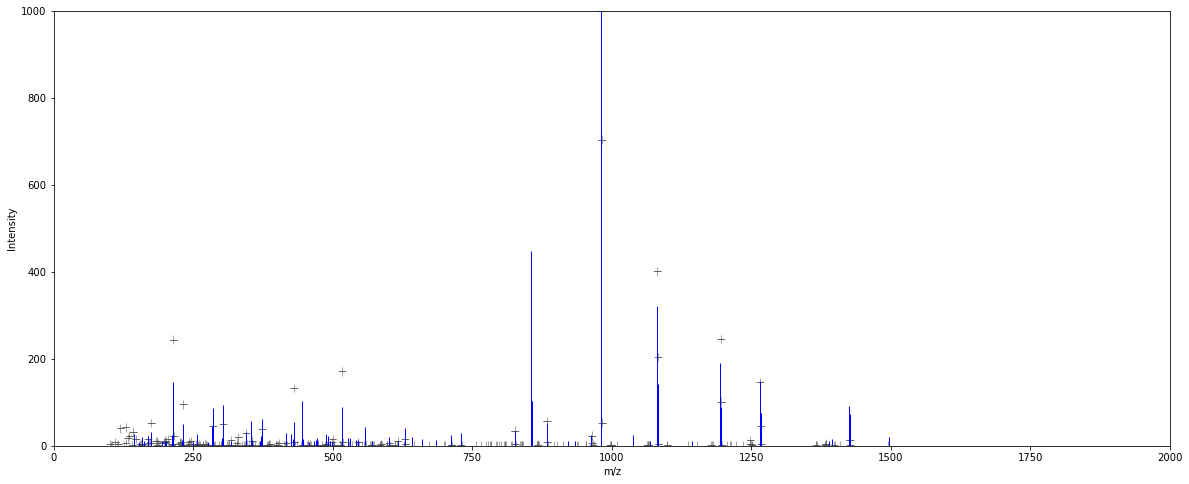

In [6]:
# pick a spectrum to plot
j = 0
fig, ax = plt.subplots(figsize=(20, 8))
experimental_spectrum = df.iloc[j]['spectrum']
predicted_spectrum = df.iloc[j]['predicted_spectrum']

experimental_spectrum.plot(ax, predicted_spectrum, normalize=1000, mirror=False, plot_stddev=True)